# Florence-2: Advancing a Unified Representation for a Variety of Vision Tasks

In [2]:
# Paper: https://arxiv.org/abs/2311.06242
# HF model: https://huggingface.co/microsoft/Florence-2-large

# Finetune Florence-2: https://huggingface.co/blog/finetune-florence2

# Also check later autodistill: https://github.com/autodistill/autodistill-florence-2

In [4]:
import requests
import transformers
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM 

In [5]:
transformers.__version__

'4.42.0'

In [6]:
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

/home/shravan/anaconda3/envs/hf/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [2]:
!ls ~/.cache/huggingface/hub

datasets--hf-internal-testing--image-matting-fixtures
datasets--segments--sidewalk-semantic
df4bd7bea9f7104f81a8518725e9586bbb2d6592702e2bad0af1ca3808b84f62.6819ee89dc782623a15da86c2a03a0a97ff530d558807d1f1edf7ce5c7d2b28f
df4bd7bea9f7104f81a8518725e9586bbb2d6592702e2bad0af1ca3808b84f62.6819ee89dc782623a15da86c2a03a0a97ff530d558807d1f1edf7ce5c7d2b28f.json
df4bd7bea9f7104f81a8518725e9586bbb2d6592702e2bad0af1ca3808b84f62.6819ee89dc782623a15da86c2a03a0a97ff530d558807d1f1edf7ce5c7d2b28f.lock
models--CompVis--stable-diffusion-v1-4
models--bert-base-uncased
models--facebook--sam-vit-base
models--google--ddpm-ema-celebahq-256
models--hustvl--vitmatte-small-composition-1k
models--lllyasviel--control_v11f1e_sd15_tile
models--lllyasviel--control_v11p_sd15_inpaint
models--microsoft--Florence-2-base-ft
models--microsoft--Florence-2-large
models--microsoft--florence-v2
models--nvidia--mit-b0
models--nvidia--segformer-b0-finetuned-ade-512-512
models--openai--clip-vit-large-patch14
models--runwayml--s

In [17]:
!ls /home/shravan/.cache/huggingface/hub/models--microsoft--Florence-2-base-ft


blobs  refs  snapshots


In [8]:
!ls /home/shravan/.cache/huggingface/hub/models--microsoft--Florence-2-base-ft/snapshots/e0b8f375661041228a6431c950adac1a5c539b98


config.json  configuration_florence2.py


In [7]:
prompt = "<OD>"

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)

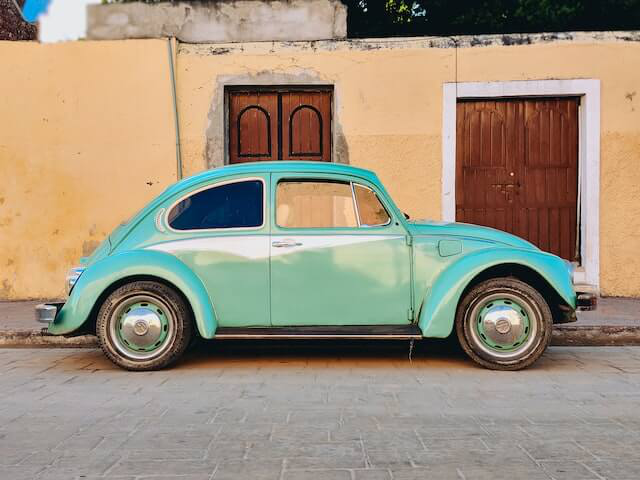

In [8]:
image

In [9]:
inputs = processor(text=prompt, images=image, return_tensors="pt")

In [10]:
inputs

{'input_ids': tensor([[    0,   574, 22486,     5,  8720,    19,  4120,   766,    11,     5,
          2274,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'pixel_values': tensor([[[[-1.1418, -0.7479, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.7650, -0.7137, -0.9192,  ..., -1.9295, -1.9467, -1.9638],
          [-0.2684, -0.7308, -0.9705,  ..., -1.9467, -1.9638, -1.9809],
          ...,
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3481,  0.3481,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.3823,  0.3823,  0.3652],
          [ 0.5707,  0.5707,  0.5707,  ...,  0.4166,  0.3994,  0.3823]],

         [[-1.3880, -0.9853, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-1.0028, -0.9503, -1.1604,  ..., -1.6506, -1.6681, -1.6856],
          [-0.4951, -0.9678, -1.2129,  ..., -1.6681, -1.6856, -1.7031],
          ...,
          [ 0.6078,  0.6078,  0.6078,  ...,  0.3978,  0.3978,  0.4153],
          [ 0.6078,  0.6078,  0.6078,

In [14]:
input_ids=inputs["input_ids"],
attention_mask=inputs["attention_mask"]
pixel_values=inputs["pixel_values"]

In [18]:
input_ids[0].shape

torch.Size([1, 13])

In [20]:
attention_mask.shape

torch.Size([1, 13])

In [21]:
pixel_values.shape

torch.Size([1, 3, 768, 768])

In [11]:
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3,
    do_sample=False
)

In [12]:
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
generated_text

'</s><s><s><s>car<loc_52><loc_332><loc_932><loc_774>door<loc_709><loc_200><loc_907><loc_545><loc_351><loc_179><loc_521><loc_342>wheel<loc_702><loc_575><loc_866><loc_771><loc_142><loc_583><loc_309><loc_771></s>'

In [13]:
parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

print(parsed_answer)

{'<OD>': {'bboxes': [[33.599998474121094, 159.59999084472656, 596.7999877929688, 371.7599792480469], [454.0799865722656, 96.23999786376953, 580.7999877929688, 261.8399963378906], [224.95999145507812, 86.15999603271484, 333.7599792480469, 164.39999389648438], [449.5999755859375, 276.239990234375, 554.5599975585938, 370.3199768066406], [91.19999694824219, 280.0799865722656, 198.0800018310547, 370.3199768066406]], 'labels': ['car', 'door', 'door', 'wheel', 'wheel']}}
